# Day 9 - 2D & 3D movies

Let's make some movies!

First, make sure you've downloaded **and unzipped** the zip file that stores the simulation data we are using today.  Link to this file [is right here](LINK).

This link was generated by running some simulations of 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline

Let's also read in our data that we saved like last week.  Again, make sure the ```hermite_library.py``` file is located in the same directory were you are running this all from.

In [2]:
from hermite_library import read_hermite_solution_from_file

Now we have to remember where our data is stored.  Probably the easiest thing to do is copy your `MyPlanetSystem.txt` or similar file to this directory and go from there.

**NOTE: you're system will have a different name!  Make sure you find your specific .txt file**

In [3]:
t_h, E_h, r_h, v_h = read_hermite_solution_from_file('myPlanetSystem_kepler101_solution1.txt')

Let's make a quick plot to remind ourselves what this system looks like:

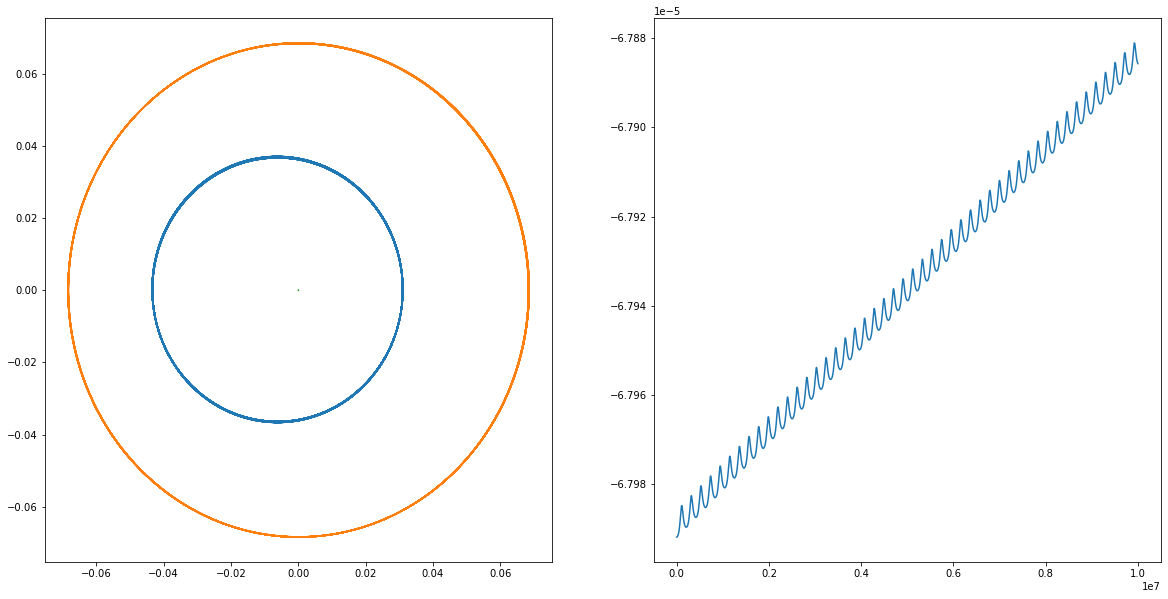

In [4]:
# first create an axis object to hold our 2 horizontal plots
fig, ax = plt.subplots(1, 2, figsize=(10*2, 10))
# figsize makes sure we are 2x times wider than higher

# loop over the number of particles in our system
for i in range(r_h.shape[0]):
    # on the 0th i.e. first set of axis plot
    # the ith planet
    # the 0th (x) axis vs the 1st (y) axis
    # and plot all the time steps (:)
    ax[0].plot(r_h[i,0,:], r_h[i, 1, :])
    
# energy plot on the 2nd set of axis
ax[1].plot(t_h, E_h)

plt.show()

Now recall we also made some 3D plots of this data, let's remind ourselves what that looked like:

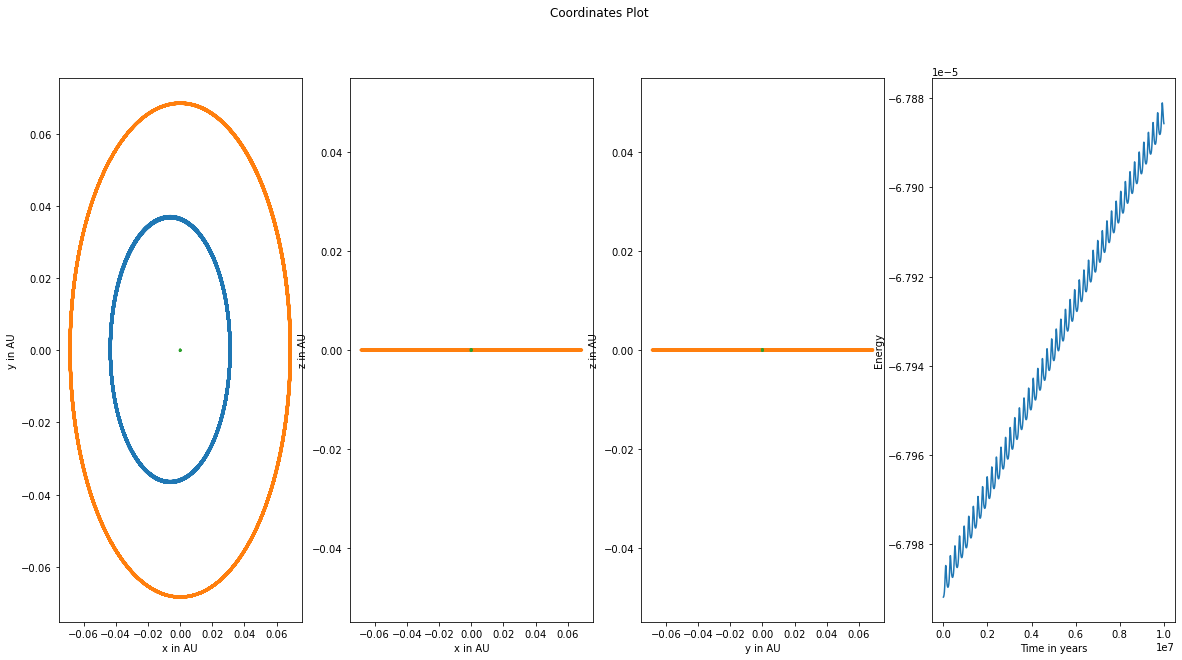

In [5]:
# we can test-replot like we did before:
fig, ax = plt.subplots(1, 4, figsize = (10*2, 10))
fig.suptitle('Coordinates Plot')

# set the labels along the horizontal (x)
#   and vertical axis
# **COMMENT ALL THESE**
ax[0].set_xlabel('x in AU')
ax[0].set_ylabel('y in AU')

ax[1].set_xlabel('x in AU')
ax[1].set_ylabel('z in AU')

ax[2].set_xlabel('y in AU')
ax[2].set_ylabel('z in AU')

# plot Euler's solution, particle 1, x-y
for i in range(r_h.shape[0]):
    ax[0].plot(r_h[i,0,:], r_h[i,1,:], lw=3)

for i in range(r_h.shape[0]):
    ax[1].plot(r_h[i,0,:], r_h[i,2,:], lw=3)

for i in range(r_h.shape[0]):
    ax[2].plot(r_h[i,1,:], r_h[i,2,:], lw=3)
    
    
ax[3].set_xlabel('Time in years')
ax[3].set_ylabel('Energy')
# re-norm energy
ax[3].plot(t_h, E_h)

plt.show()

Note my system here is pretty 2D and not exciting, your's might be very different!

## Animations

How would we make an animation of this?  We will basically make "frames" of data - one for each timestep, or subset of times (more on that in a moment) and then plot this.  

There was optional code from last week that did a simple animation.  Let's start with just a face-on or x-axis plot.  From above, we know this should look something like, or whatever equivalent you system looks like:

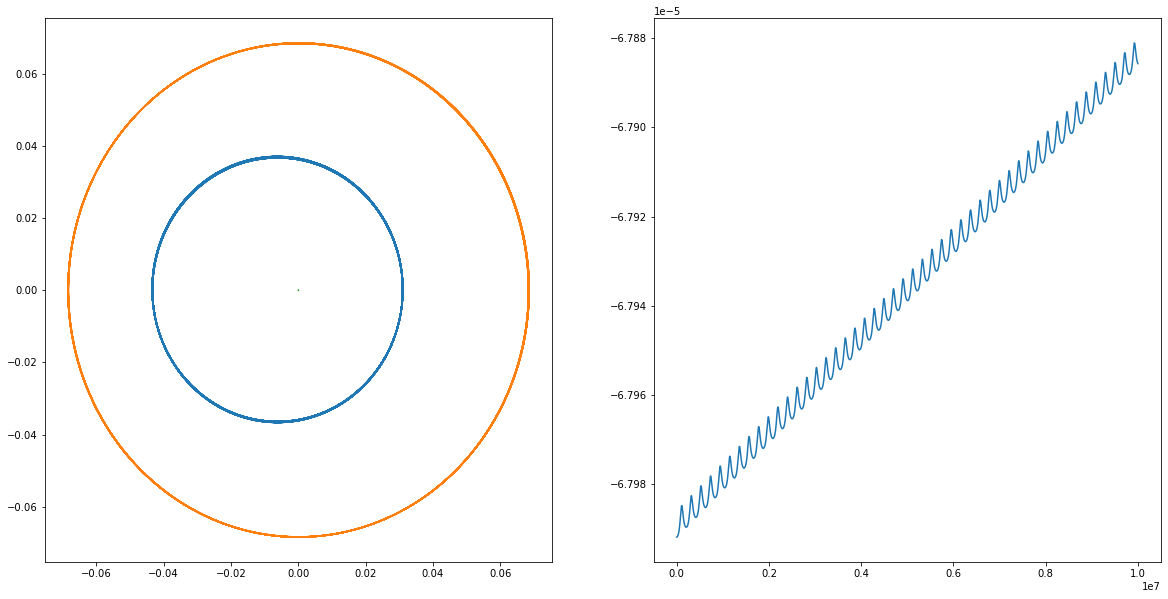

In [6]:
# first create an axis object to hold our 2 horizontal plots
fig, ax = plt.subplots(1, 2, figsize=(10*2, 10))
# figsize makes sure we are 2x times wider than higher

# loop over the number of particles in our system
for i in range(r_h.shape[0]):
    # on the 0th i.e. first set of axis plot
    # the ith planet
    # the 0th (x) axis vs the 1st (y) axis
    # and plot all the time steps (:)
    ax[0].plot(r_h[i,0,:], r_h[i, 1, :])
    
# energy plot on the 2nd set of axis
ax[1].plot(t_h, E_h)

plt.show()

To do an animation, let's start by importing some things we need:

In [7]:
#!conda install -c conda-forge jsanimation --yes

In [8]:
#!pip uninstall JSAnimation --yes

In [9]:
# if you get an error try:
#!pip install JSAnimation

#from JSAnimation.IPython_display import display_animation
from matplotlib import animation

So, we should expect that if we make a movie of this developing, this should be the final frame of our movie.

One thing we need to be aware of is that the more time steps we want to show, i.e. the number of `frames`, the longer it will take to generate this animation, and the longer it will take to save to a file.  So we are going to *subsample* our dataset for outputing purposes.

In [10]:
# plot how many steps?  i.e. every X number of steps?
# we probably don't want a huge movie with every step
stepSize = 50

In [11]:
# r_h[number of particles, number of coords, number of times]
# subsample
# we will subsample time with indexing like: start:stop:step
r = r_h[:,:,0:-1:stepSize]
t = t_h[0:-1:stepSize]
E = E_h[0:-1:stepSize]

r.shape, r_h.shape

((3, 3, 100), (3, 3, 5000))

What do we think the last frame of our animation should look like?

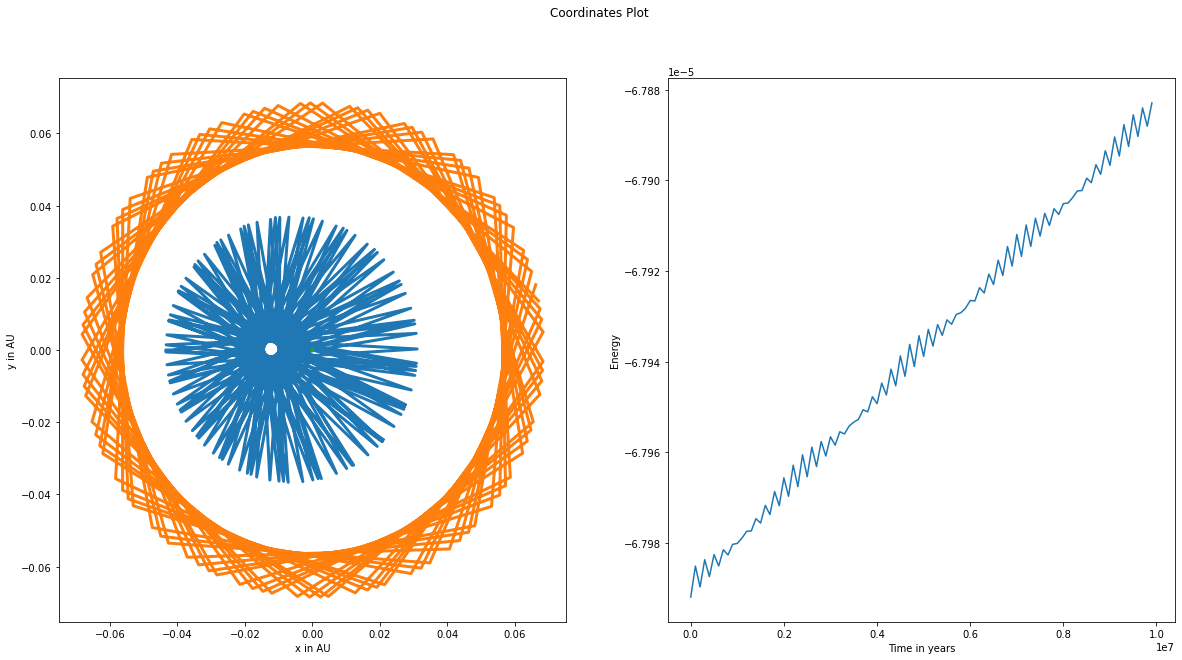

In [12]:
# let's plot!
fig, ax = plt.subplots(1, 2, figsize = (10*2, 10))
fig.suptitle('Coordinates Plot')

ax[0].set_xlabel('x in AU')
ax[0].set_ylabel('y in AU')

# recall:
# r[NUMBER OF PARTICLES, NUMBER COORDINATES (X,Y,Z), NUMBER OF TIMESTEPS]
for i in range(r.shape[0]):
    ax[0].plot(r[i,0,:], r[i,1,:], lw=3)

ax[1].set_xlabel('Time in years')
ax[1].set_ylabel('Energy')
# re-norm energy
ax[1].plot(t, E)

plt.show()

Now that we have what we want to plot, let's use a library to import and make animations:

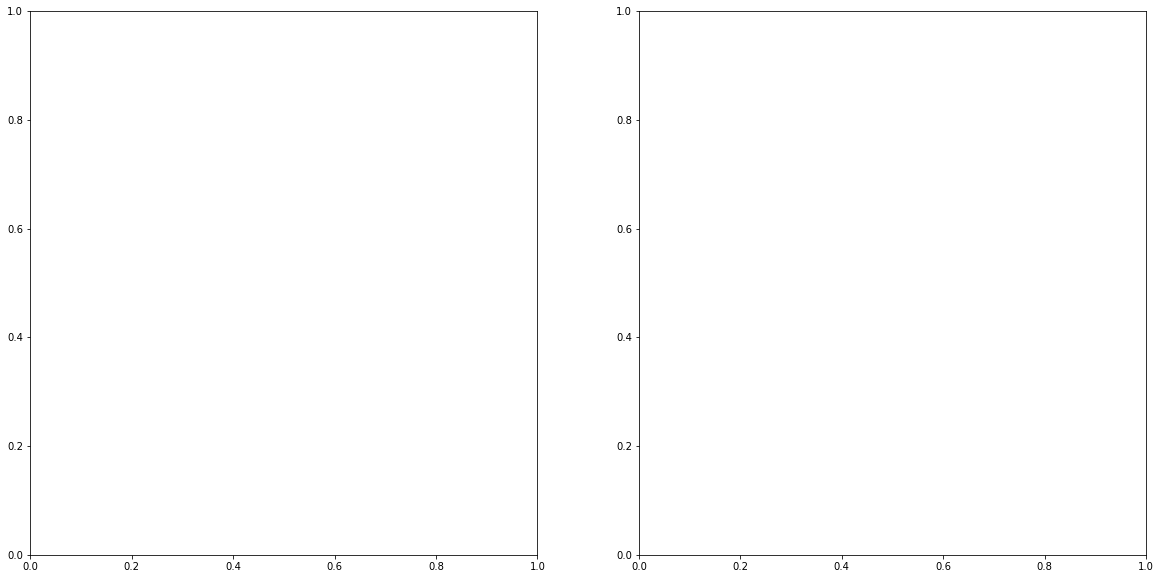

In [13]:
# initalize our figure
fig, ax = plt.subplots(1, 2, figsize = (10*2, 10))
# empty fig shows up

In [14]:
from animations_library import plot_animations

In [15]:
init, animate, nFrames = plot_animations(fig, ax, t, E, r)

Notes: above modified following https://stackoverflow.com/questions/20624408/matplotlib-animating-multiple-lines-and-text

In [16]:
# if you get "TypeError: a bytes-like object is required, not 'str'"
#!conda update matplotlib --yes

In [17]:
%matplotlib notebook

In [18]:
# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=nFrames, interval=20, blit=True)
plt.show()

In [19]:
# call our new function to display the animation
#display_animation(anim)
#anim

In [19]:
#display_animation?

Ok, the above is pretty neat (looks cool with the short number of frames we have here).  The reason it looks so groovy is because we are only using one out of every 50 time steps.  You can see that already we are mis-leading our viewer, but we might want to start this way because higher resolution animations will take longer to run.  

Before using your own sims, you might want to know how do we save it as a movie we can post places?  Turns out that is relatively easy with a few lines of code:

Easiest:

In [29]:
anim.save?

In [31]:
#anim.save('myAnimation.gif', writer='imagemagick')
#anim.save('myAnimation.gif')

# NOTE: you will have to specifiy this image writer after installing ffmpeg

And then you can double click from your notebook folder and it will pop up in your browser.  Another option is to make an mp4:

In [22]:
# note: if you get a "ffmpeg not found" error try:

# I think its this one 
#  you might have to restart kernel after this
#!conda install -c conda-forge ffmpeg --yes 

# probably not this one
#!pip install imageio-ffmpeg



In [23]:
# Set up formatting for the movie files
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

In [24]:
# save!
anim.save('anim.mp4', writer=writer)

In [27]:
from IPython.display import Video

#Video("anim.mp4")
Video("anim.mp4",width=800)

In [26]:
Video?

### Exercise
Repeat making movies using this method for your own system.  

**Optional**: modifyin the plotting library code

Try different x/y/z combinations or make a 1x4 plot like we did with still images.  Think about any symbols you want to add - arrows? How would you add a dot to show where the planet is? (Hint: google "matplotlib marker styles")

Hint: start with one change - how would you change the colors of the plots?  If you wanted to figure out how to plot different symbols, how would you do that?

**Note**: for this you will have to modify the library code and then re-import your the library by doing *Kernel -> Restart+Run all* 

You can also just copy-paste the code in your notebook and go from there.